## Equally-Weighted Portfolio Backtest.

In [4]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.heuristics.equally_weighted import EWStrategy
from run import Dataset, initialize

In [6]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 50

trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=1,
    min_exposure=0,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [7]:
strategy = EWStrategy()

strategy_name = strategy.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [00:18<00:00, 15.03it/s]


StrategyStatistics:
* final_nav = 6.390788
* geom_avg_total_r = 0.102476
* geom_avg_xs_r = 0.094697
* std_xs_r = 0.206839
* min_xs_r = -0.113292
* max_xs_r = 0.108174
* skew = -0.052996
* kurtosis = 10.015339
* max_dd = -0.528637
* sharpe = 0.457830
* alpha_buy_hold = 0.024904
* tracking_error_buy_hold = 0.034983
* ir_buy_hold = 0.711881
* factor_loadings = {'low_risk': 0.17824373360488166, 'momentum': -0.08202169922263355, 'quality': -0.027312105046139817, 'size': 0.013337997634941704, 'value': -0.14709016721937512, 'spx': 0.9977093024956469}
* alpha_benchmark = 0.028835
* alpha_benchmark_pvalue = 0.000125
* tracking_error_benchmark = 0.030497
* ir_benchmark = 0.945493
* ttest_pval = 0.379176
* levene_pval = 0.089488
* timing_ability_coef = 0.024705
* timing_ability_pval = 0.000003

In [8]:
result.std_xs_r, result.sharpe

(0.2068386650821284, 0.45783029785348806)

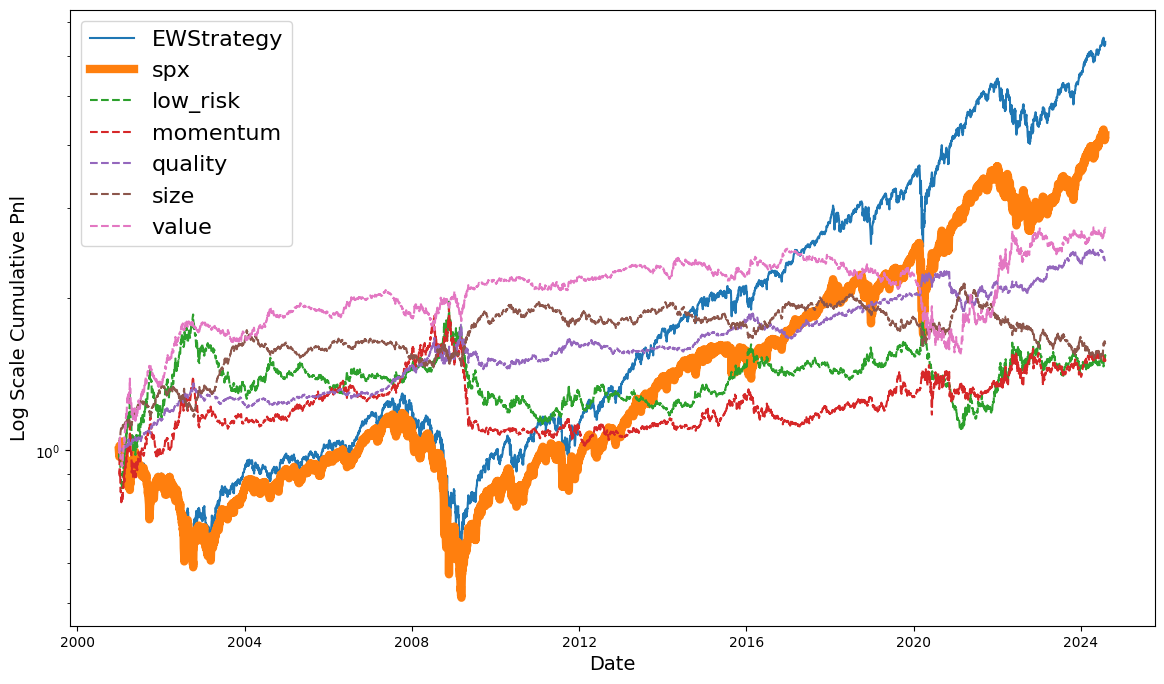

In [9]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

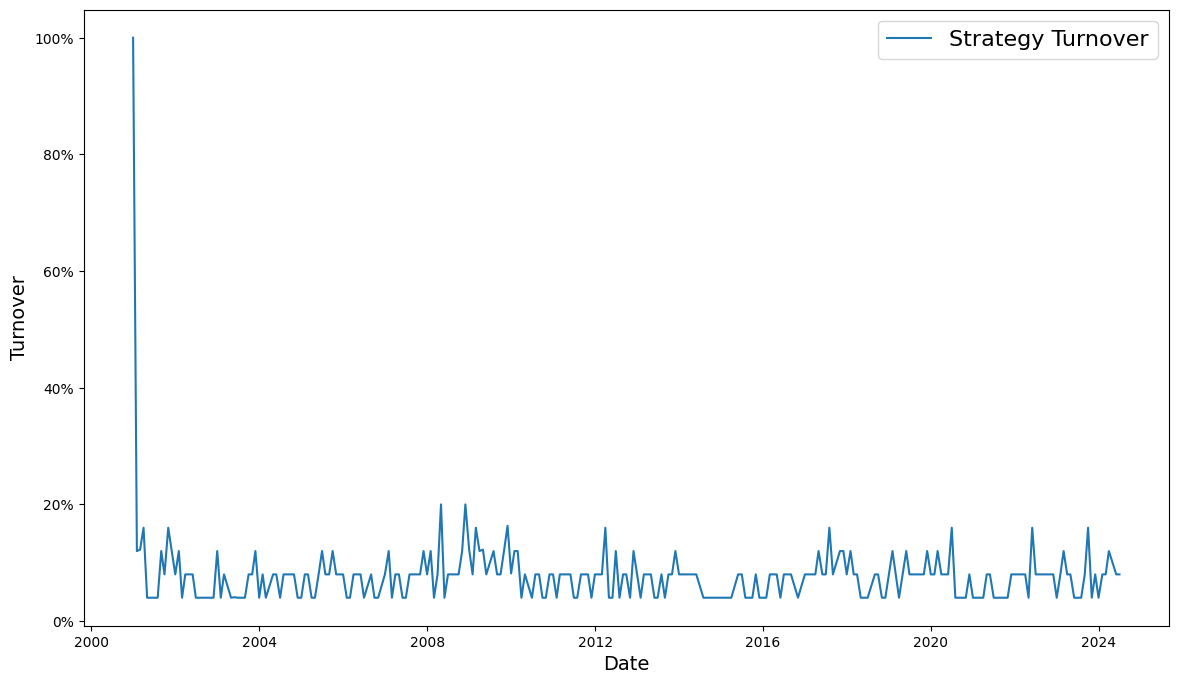

In [10]:
runner.plot_turnover()

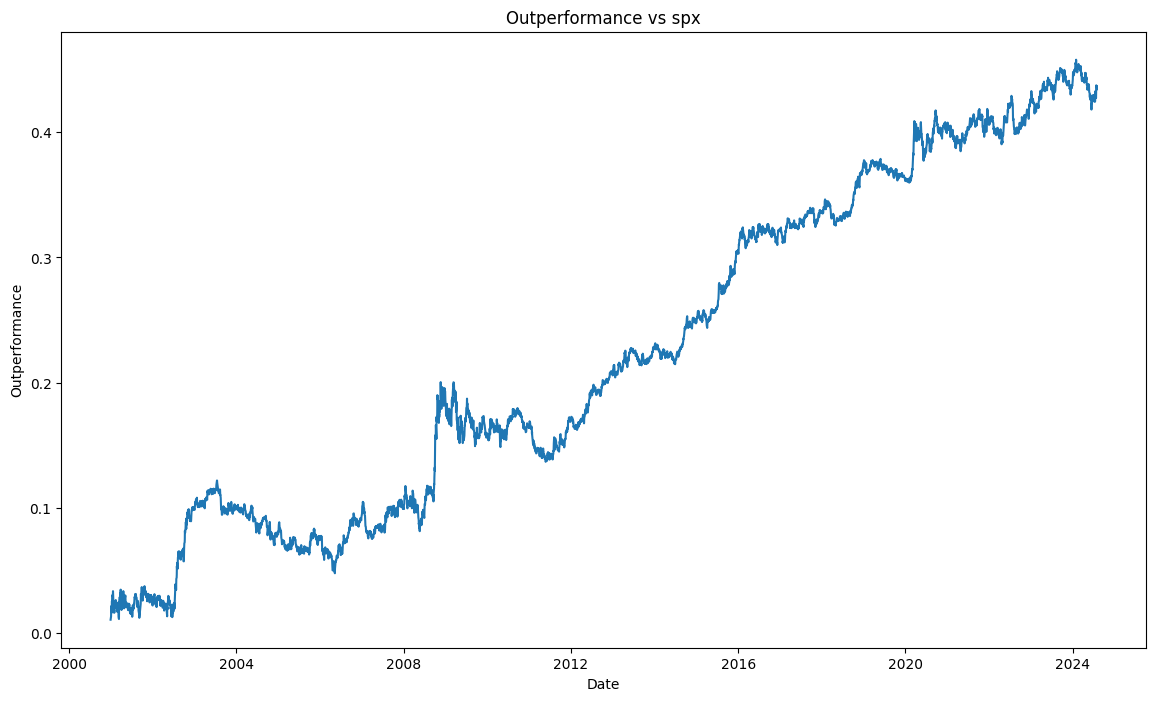

In [11]:
runner.plot_outperformance(mkt_only=True)

In [12]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")